In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('OEP_refined_1.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.Date = pd.to_datetime(df.Date)
df['Date'] +=  pd.to_timedelta(df.Hour, unit='h')
df = df.set_index(df.Date).drop(columns = ['Date'])
df.drop(df.loc[df['¢/kWh'].isna()].index, inplace = True)
df.sort_index(inplace = True)

## Dumb-Method 
### A baseline model that assumes the current price retains within the next 24 hours.
#### First let us observe a 24-hour change in our plot.

In [28]:
pd.options.mode.chained_assignment = None
#df= df[df['¢/kWh'] != 0]
df['pred_one_day'] = df['¢/kWh'].shift(+24)
df['difference_one_day'] = (df['pred_one_day'] - df['¢/kWh']).abs()
df_train= df.loc[:'2019-12-31 23:00:00']
df_test_day= df.loc['2020-12-30 00:00:00':'2020-12-31 00:00:00']
df_test_day['one_day_difference_percentage'] = ((df_test_day['difference_one_day']+1)/(df_test_day['¢/kWh']+1))*100
One_Day_Diff_Percentage= df_test_day['one_day_difference_percentage'].mean()
text='Percentage of 24-hours Price Difference: %{}'
print(text.format(round(One_Day_Diff_Percentage)))

Percentage of 24-hours Price Difference: %145


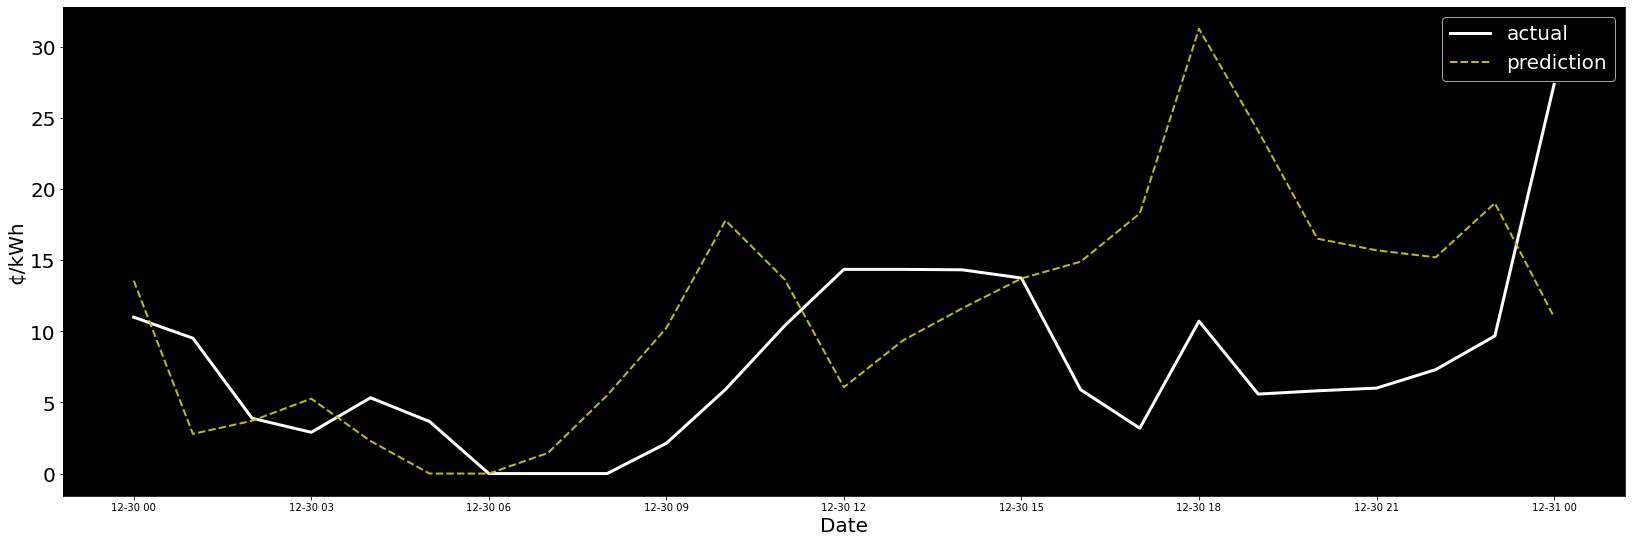

In [29]:
fig, ax1 = plt.subplots(figsize = (28,9))

ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel('¢/kWh', fontsize=20)
plt.rcParams['axes.facecolor'] = 'black'
ax1.plot(df_test_day['¢/kWh'], label = 'actual', color = 'w', linewidth=3)
ax1.plot(df_test_day['pred_one_day'], label = 'prediction', color = 'y', linestyle='--',linewidth=2)
ax1.tick_params(axis='y', labelsize = 20)

ax1.legend(prop={'size': 20},labelcolor='white')

#### Now let us observe a month change in our plot.

In [30]:
df_test_month= df.loc['2020-12-01 00:00:00':'2020-12-31 00:00:00']
df_test_month['one_day_difference_percentage'] = ((df_test_month['difference_one_day']+1)/(df_test_month['¢/kWh']+1))*100
One_Day_Diff_Percentage= df_test_month['one_day_difference_percentage'].mean()
text='Percentage of 24-hours Price Difference: %{}'
print(text.format(round(One_Day_Diff_Percentage)))

Percentage of 24-hours Price Difference: %155


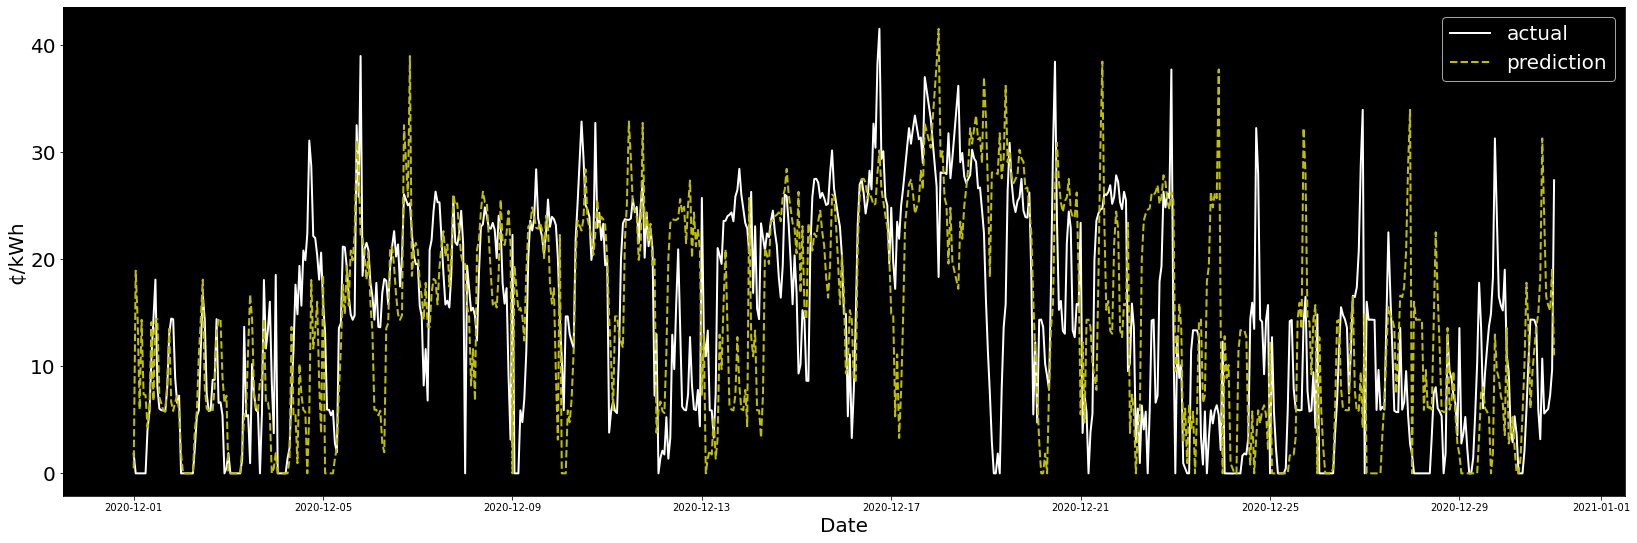

In [31]:
fig, ax2 = plt.subplots(figsize = (28,9))

ax2.set_xlabel('Date', fontsize=20)
ax2.set_ylabel('¢/kWh', fontsize=20)
plt.rcParams['axes.facecolor'] = 'black'
ax2.plot(df_test_month['¢/kWh'], label = 'actual', color = 'w', linewidth=2)
ax2.plot(df_test_month['pred_one_day'], label = 'prediction', color = 'y', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelsize = 20)

ax2.legend(prop={'size': 20},labelcolor='white')